In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Predicting the price of used cars

## Problem Definition

The goal of this competition is to build a model to predict the price of used cars based on various attributes.

## Data

The data i am using is from kaggle DSN Bootcamp Qualification Hackathon Database:

https://www.kaggle.com/competitions/hackathon-qualification

## Evaluation

The model will be evaluated using Root Mean Squared Error (RMSE). I will be submitting a file filling the predicted price of the used cars in the test file 

## Feature

* train.csv - the training dataset; `price` is the continuous target
* test.csv - the test dataset; my objective is to predict the value of price for each row
* sample_submission.csv - a sample submission file in the correct format

In [2]:
used_cars = pd.read_csv("/kaggle/input/hackathon-qualification/archive/train.csv")
used_cars.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
used_cars.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [4]:
used_cars.fuel_type.value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [5]:
used_cars.accident.value_counts()

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

In [6]:
## filling the missing values in columns
used_cars[["fuel_type", "accident", "clean_title"]] = used_cars[["fuel_type", "accident", "clean_title"]].fillna("Missing")
used_cars.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [7]:
used_cars

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,Missing,84900


In [8]:
## Feature engineering (create new columns; horsepower, cylinder and liters from engine)
import re

def parse_engine(engine_str):
    # Handle missing entries
    if pd.isna(engine_str):
        return np.nan, np.nan, np.nan

    # Default values
    horsepower = np.nan
    liters = np.nan
    cylinders = np.nan

    # Extract horsepower
    if "HP" in engine_str:
        # Look for number before "HP"
        match = re.search(r"([\d\.]+)\s*HP", engine_str)
        if match:
            horsepower = float(match.group(1))

    # Extract liters
    if "L" in engine_str:
        match = re.search(r"([\d\.]+)\s*L", engine_str)
        if match:
            liters = float(match.group(1))

    # Extract cylinders
    if "Cylinder" in engine_str:
        match = re.search(r"(\d+)\s*Cylinder", engine_str)
        if match:
            cylinders = int(match.group(1))
    elif "V" in engine_str:  # handles V6, V8, etc.
        match = re.search(r"V(\d+)", engine_str)
        if match:
            cylinders = int(match.group(1))

    return horsepower, liters, cylinders

# Apply to dataframe
used_cars[["horsepower", "liters", "cylinders"]] = (
    used_cars["engine"].apply(parse_engine).tolist()
)


In [9]:
used_cars = used_cars.drop(["id", "engine"], axis=1)
used_cars

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,liters,cylinders
0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0
1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0,6.2,8.0
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0,3.0,6.0
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,7-Speed A/T,White,Black,None reported,Yes,86900,469.0,4.0,8.0
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,Missing,84900,NaN,3.0,NaN


In [10]:
used_cars.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type           0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
price               0
horsepower      33259
liters           6698
cylinders       21763
dtype: int64

In [11]:
for col in ["horsepower", "liters", "cylinders"]:
    used_cars[col] = used_cars[col].fillna(used_cars.groupby(["brand", "model"])[col].transform("median"))

    used_cars[col] = used_cars[col].fillna(used_cars.groupby("brand")[col].transform("median"))

    used_cars[col] = used_cars[col].fillna(used_cars[col].median())

In [12]:
used_cars.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
horsepower      0
liters          0
cylinders       0
dtype: int64

In [13]:
# split data to training and validation set
from sklearn.model_selection import train_test_split

X = used_cars.drop("price", axis=1)
y = used_cars["price"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,horsepower,liters,cylinders
184031,Mercedes-Benz,GLA-Class GLA 250 4MATIC,2017,61675,E85 Flex Fuel,Transmission w/Dual Shift Mode,Gray,Black,At least 1 accident or damage reported,Yes,208.0,2.0,4.0
173831,Nissan,Frontier SV,2003,185000,Gasoline,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,239.0,4.0,6.0
183819,Ford,F-150 XLT,2020,92000,Gasoline,10-Speed A/T,Gray,Gray,At least 1 accident or damage reported,Yes,325.0,2.7,6.0
85525,Hyundai,Elantra N Base,2023,5483,Gasoline,6-Speed M/T,Black,Black,None reported,Missing,276.0,2.0,4.0
41872,Dodge,Charger SRT Hellcat Widebody,2023,5000,Gasoline,6-Speed A/T,Red,Black,None reported,Yes,717.0,6.2,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,Chevrolet,Corvette Base,2007,89106,Gasoline,6-Speed M/T,Red,Beige,At least 1 accident or damage reported,Yes,350.0,5.7,8.0
103694,BMW,740 i,2019,57300,Gasoline,7-Speed A/T,Black,Black,None reported,Yes,320.0,3.0,6.0
131932,Porsche,911 Carrera 4S,2021,31500,Gasoline,8-Speed A/T,Black,Black,None reported,Yes,420.0,3.0,6.0
146867,Mercedes-Benz,M-Class ML 350,2011,186000,Gasoline,7-Speed A/T,Black,Black,None reported,Yes,268.0,3.5,6.0


In [15]:
X_train.fuel_type.value_counts()

fuel_type
Gasoline          132832
Hybrid              5437
E85 Flex Fuel       4328
Missing             4060
Diesel              3101
–                    625
Plug-In Hybrid       433
not supported         10
Name: count, dtype: int64

## Handling Categorical Features (Target and OneHot Encoding)

In [16]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder

high_cardinal = ["model", "brand", "int_col", "ext_col", "transmission"]
low_cardinal = ["fuel_type", "accident", "clean_title"]
numeric = ["model_year", "milage", "horsepower", "liters", "cylinders"]

one_hot = OneHotEncoder(handle_unknown="ignore", sparse=False)
target_encode = TargetEncoder()

Preprocessor = ColumnTransformer([
    ("one_hot", one_hot, low_cardinal),
    ("target", target_encode, high_cardinal),
    ("num", "passthrough", numeric)
])

X_train_encode = Preprocessor.fit_transform(X_train, y_train)
X_valid_encode = Preprocessor.transform(X_valid)




/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
one_hot_features = Preprocessor.named_transformers_["one_hot"].get_feature_names_out(low_cardinal)
all_features = list(one_hot_features) + list(high_cardinal) + list(numeric)

X_train_new = pd.DataFrame(X_train_encode, columns=all_features, index=y_train.index)
X_valid_new = pd.DataFrame(X_valid_encode, columns=all_features, index=y_valid.index)


In [18]:
X_valid_new

,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Missing,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,accident_At least 1 accident or damage reported,accident_Missing,...,model,brand,int_col,ext_col,transmission,model_year,milage,horsepower,liters,cylinders
111355,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39599.148297,28973.493523,41343.566254,47892.646397,38752.895137,2022.0,23677.0,280.0,3.5,6.0
182258,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,47183.273401,40948.873763,29929.819569,23801.951860,31892.612674,2004.0,50000.0,280.0,3.9,8.0
14147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44220.000894,29402.167109,59131.218876,59764.711792,63179.345739,2019.0,109646.0,310.0,3.6,6.0
79313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,30047.694507,43598.839704,45550.650737,40931.355149,56415.928862,2016.0,102000.0,320.0,3.0,6.0
101160,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25308.488268,28889.535341,45550.650737,47823.737565,56415.928862,2020.0,75151.0,295.0,3.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71604,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52455.216535,40948.873763,44700.751858,47823.737565,64848.175955,2021.0,71536.0,400.0,3.5,6.0
137137,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70523.030627,53326.030167,45550.650737,40931.355149,56415.928862,2023.0,2121.0,296.0,2.0,4.0
70567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19563.363526,29108.819120,27986.298258,39705.577817,25901.264263,2013.0,72639.0,280.0,3.5,6.0
94567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23671.348463,15184.689822,29929.819569,40931.355149,31892.612674,2013.0,115000.0,179.0,2.5,4.0


In [19]:
X_train_new

,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Missing,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,accident_At least 1 accident or damage reported,accident_Missing,...,model,brand,int_col,ext_col,transmission,model_year,milage,horsepower,liters,cylinders
184031,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,25956.284654,51076.554126,45550.650737,47823.737565,50140.517038,2017.0,61675.0,208.0,2.0,4.0
173831,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,16884.559426,28973.493523,27986.298258,32123.241021,31892.612674,2003.0,185000.0,239.0,4.0,6.0
183819,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,43063.632584,40948.873763,27986.298258,47823.737565,58422.036009,2020.0,92000.0,325.0,2.7,6.0
85525,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42868.037174,25834.729909,45550.650737,42218.214062,33287.833627,2023.0,5483.0,276.0,2.0,4.0
41872,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73888.852797,33359.465358,45550.650737,39705.577817,25901.264263,2023.0,5000.0,717.0,6.2,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,37733.240506,41760.248779,29929.819569,39705.577817,33287.833627,2007.0,89106.0,350.0,5.7,8.0
103694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35501.319454,43598.839704,45550.650737,42218.214062,47043.729560,2019.0,57300.0,320.0,3.0,6.0
131932,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70379.841615,70567.761393,45550.650737,42218.214062,56415.928862,2021.0,31500.0,420.0,3.0,6.0
146867,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39957.015571,51076.554126,45550.650737,42218.214062,47043.729560,2011.0,186000.0,268.0,3.5,6.0


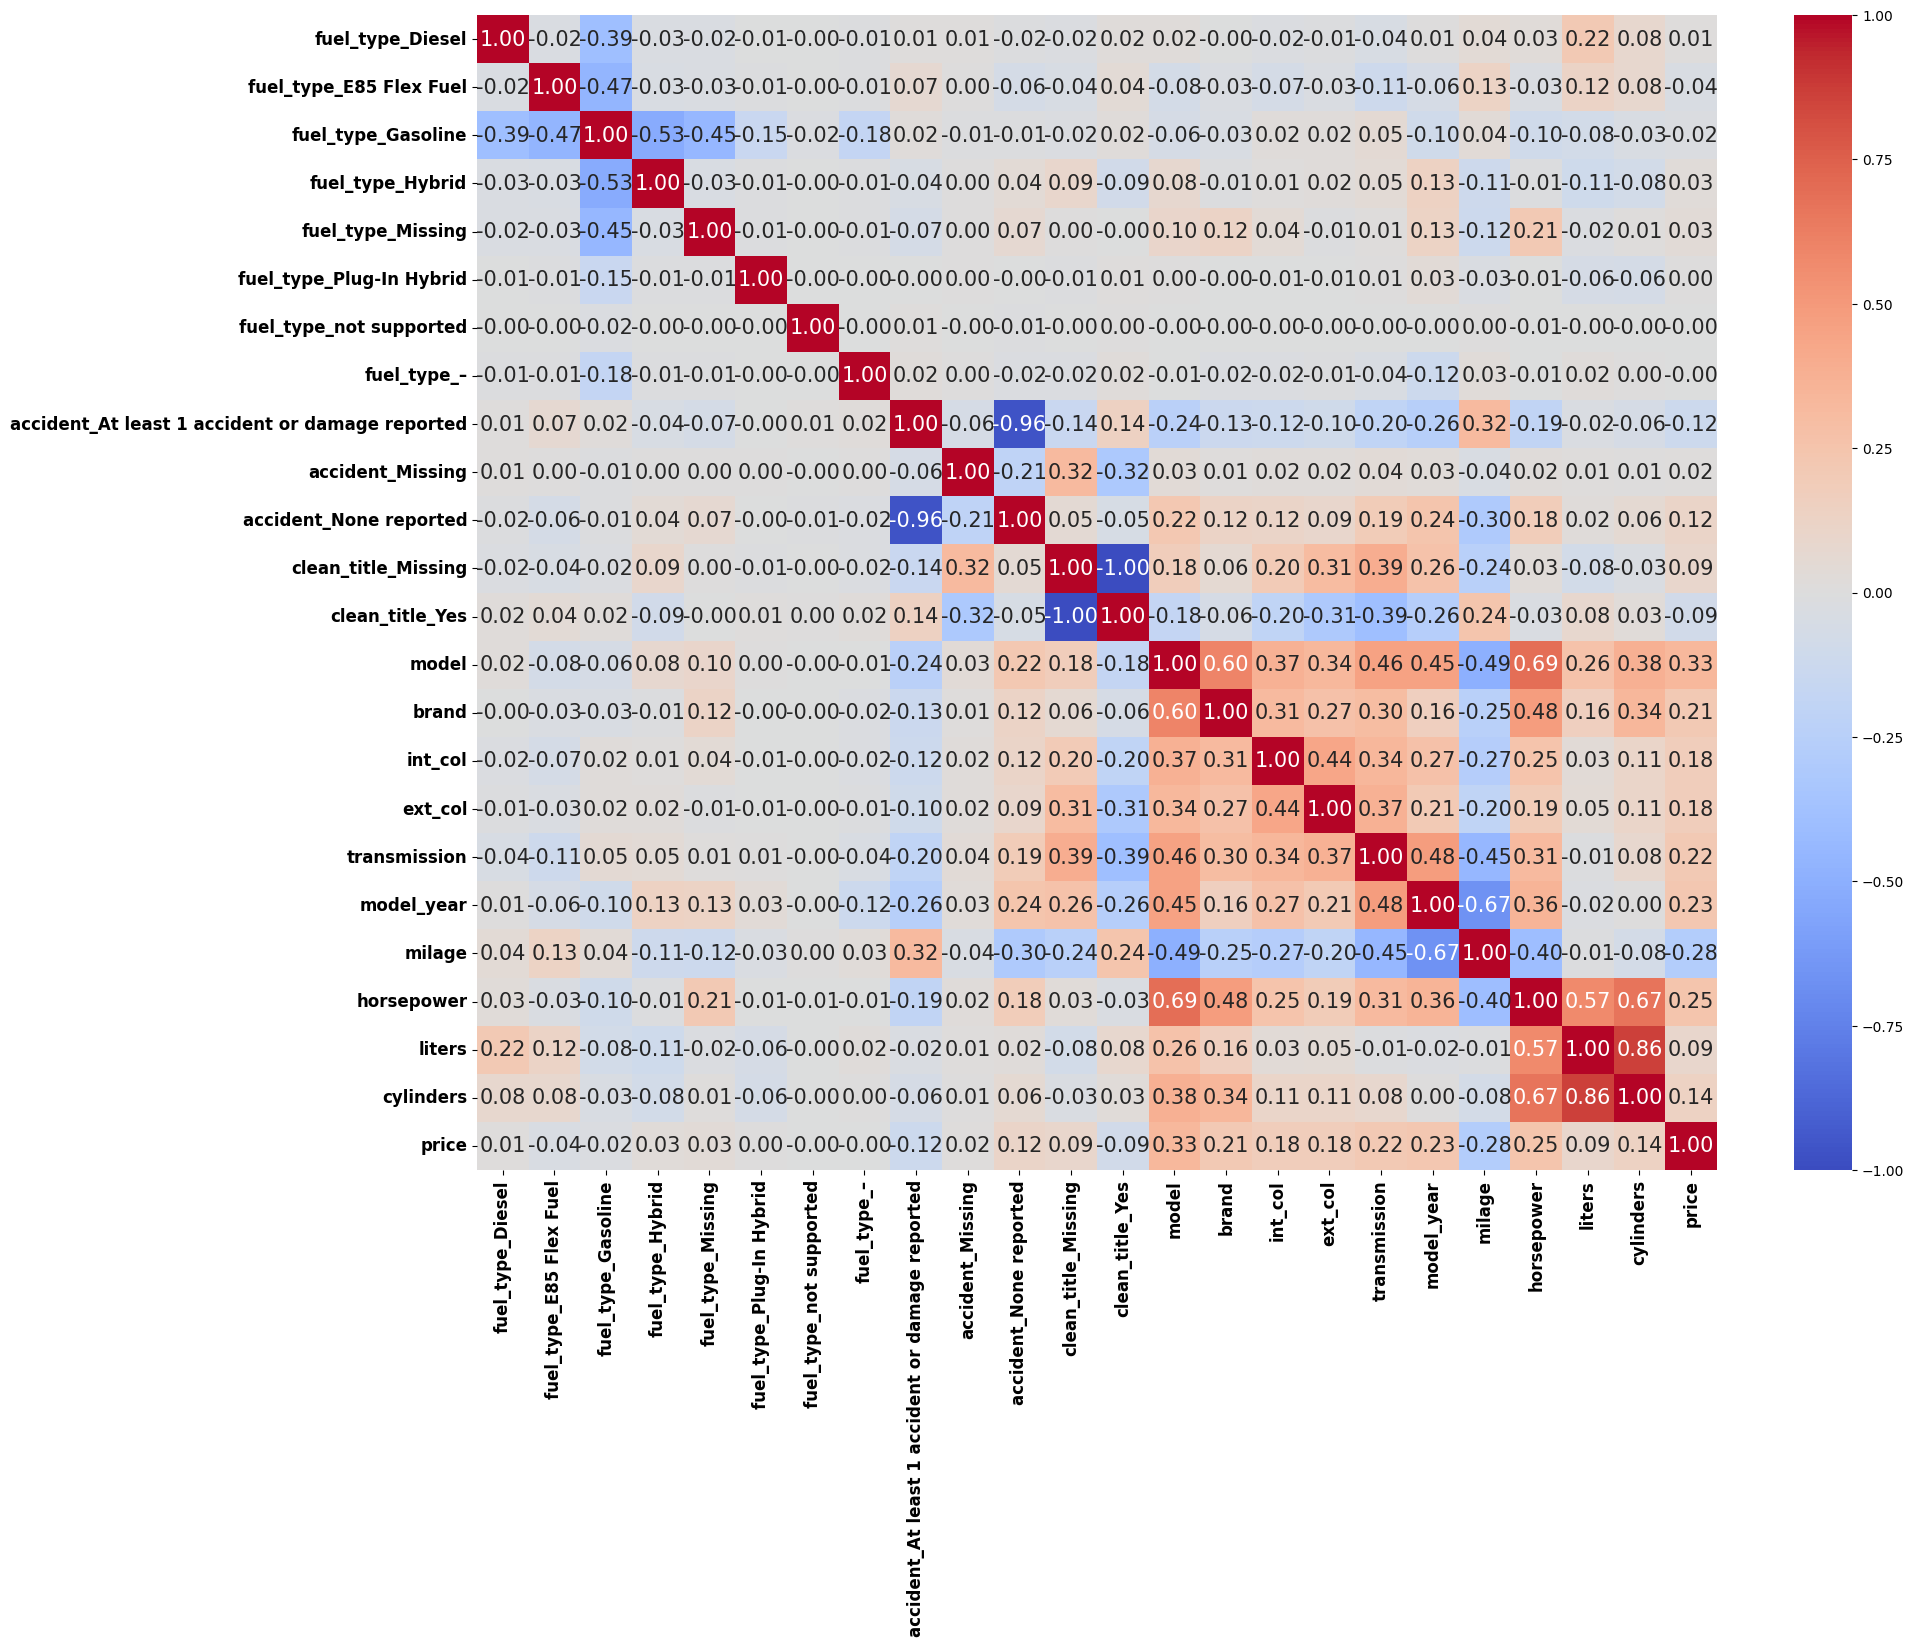

In [21]:
# Correlation
import matplotlib.pyplot as plt
import seaborn as sns
X_train_new["price"] = y_train
corr = X_train_new.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 15})
plt.xticks(fontsize=12, weight="bold")
plt.yticks(fontsize=12, weight="bold")
plt.show()


## Correlation Insights

* `Mileage` shows a negative correlation with car `price`, indicating that as a vehicle’s mileage increases, its market value tends to decrease.

* `Horsepower` and `Model Year` are both positively correlated with `price`, meaning newer cars with more powerful engines generally command higher prices.

## Modelling (CatBoost and XGBoost)

In [22]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

cat_model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.05,
                             loss_function="RMSE",
                             eval_metric="RMSE",
                             depth=7,
                             verbose=100,
                             random_state=42)

cat_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

cat_model.fit(X_train, y_train, cat_features=cat_features, use_best_model=True, eval_set=(X_valid, y_valid))



0:	learn: 79379.6828996	test: 74085.2739126	best: 74085.2739126 (0)	total: 210ms	remaining: 3m 29s
100:	learn: 73439.2122464	test: 68165.4906831	best: 68165.4906831 (100)	total: 11.3s	remaining: 1m 40s
200:	learn: 72971.1003433	test: 68082.4035068	best: 68082.1977548 (199)	total: 21.5s	remaining: 1m 25s
300:	learn: 72618.6123842	test: 68019.9938317	best: 68019.9938317 (300)	total: 31s	remaining: 1m 12s
400:	learn: 72233.0433194	test: 68020.5579883	best: 68011.0454887 (380)	total: 41s	remaining: 1m 1s
500:	learn: 71836.9498532	test: 68024.3029171	best: 68011.0454887 (380)	total: 52.1s	remaining: 51.9s
600:	learn: 71486.2293586	test: 67997.3746855	best: 67996.7113344 (594)	total: 1m 3s	remaining: 42.1s
700:	learn: 71193.4325753	test: 67991.3247671	best: 67986.1031730 (682)	total: 1m 14s	remaining: 31.8s
800:	learn: 70856.7058173	test: 67987.7900286	best: 67973.8347280 (747)	total: 1m 25s	remaining: 21.4s
900:	learn: 70592.4471938	test: 67992.4259509	best: 67973.8347280 (747)	total: 1m 36

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
cat_preds = cat_model.predict(X_valid)

cat_MAE = mean_absolute_error(y_valid, cat_preds)

cat_RMSE = np.sqrt(mean_squared_error(y_valid, cat_preds))

print(f"CatBoost_RMSE: {cat_RMSE}")
print(f"CatBoost_MAE: {cat_MAE}")

CatBoost_RMSE: 67973.83472797505
CatBoost_MAE: 19454.563637473442


In [ ]:
X_train_new = X_train_new.drop("price", axis=1)

In [24]:
# train XGBoostRegressor model
xgb_model = XGBRegressor(n_estimators=1000,
                         learning_rate=0.03,
                         objective="reg:squarederror",
                         random_state=42,
                         early_stopping_rounds=50)

xgb_model.fit(X_train_new, y_train, eval_set=[(X_valid_new, y_valid)], verbose=100)

[0]	validation_0-rmse:74228.37863
[100]	validation_0-rmse:68722.00481
[164]	validation_0-rmse:68824.17070


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [25]:
xgb_preds = xgb_model.predict(X_valid_new)

xgb_MAE = mean_absolute_error(y_valid, xgb_preds)

xgb_RMSE = np.sqrt(mean_squared_error(y_valid, xgb_preds))

print(f"XGBoost_RMSE: {xgb_RMSE}")
print(f"XGBoost_MAE: {xgb_MAE}")

XGBoost_RMSE: 68719.25017167522
XGBoost_MAE: 19594.36915010069


CatBoost Regressor outperformed XGBoost, achieving an RMSE of 67,973.83 compared to XGBoost’s 68,719.25. CatBoost’s advantage comes from its ability to handle categorical features natively and its robustness to missing values. 
The next action is to tune both models to see if they can perform better

## Tuning Hyperparameters

In [34]:
# tuning XGBoost model
%%time
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [500, 800, 1000],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

xgb_rs_model = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=params,
    n_iter=100,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=1,
    n_jobs=2
)

xgb_rs_model.fit(X_train_new, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 20 s, sys: 2.62 s, total: 22.6 s
Wall time: 39min 3s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=100, n_jobs=2,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.1],
                                        'max_depth': [4, 6, 8, 10],
                                        'n_estimators': [500, 800, 1000],
                                        'subsample': [0.7, 0.8, 1]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [35]:
xgb_best_model = xgb_rs_model.best_estimator_
xgb_rs_model.best_params_

{'subsample': 1,
 'n_estimators': 800,
 'max_depth': 4,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7}

In [36]:
xgb_preds = xgb_best_model.predict(X_valid_new)

xgb_MAE = mean_absolute_error(y_valid, xgb_preds)

xgb_RMSE = np.sqrt(mean_squared_error(y_valid, xgb_preds))

print(f"XGBoost_RMSE: {xgb_RMSE}")
print(f"XGBoost_MAE: {xgb_MAE}")

XGBoost_RMSE: 68201.15820620817
XGBoost_MAE: 19626.26718129208


In [40]:
## Tuning CatBoost model
%%time

params = {
    'iterations': [200, 300, 500],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 0.5, 1, 2, 5],
    'random_strength': [0, 1, 2, 3],
}

cat_model = CatBoostRegressor(
    eval_metric='RMSE',
    random_seed=42,
    verbose=0
)

cat_rs_model = RandomizedSearchCV(estimator=cat_model,
                                 param_distributions=params,
                                 n_iter=100,
                                 cv=5,
                                 scoring='neg_root_mean_squared_error',
                                 random_state=42,
                                 verbose=True,
                                 )

cat_rs_model.fit(X_train, y_train, cat_features=cat_features)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 13h 58min 50s, sys: 1h 8min 53s, total: 15h 7min 43s
Wall time: 3h 52min 5s


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7f5370268f50>,
                   n_iter=100,
                   param_distributions={'bagging_temperature': [0, 0.5, 1, 2,
                                                                5],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [200, 300, 500],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.1],
                                        'random_strength': [0, 1, 2, 3]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=True)

In [45]:
cat_best_model = cat_rs_model.best_estimator_
cat_rs_model.best_params_

{'random_strength': 1,
 'learning_rate': 0.03,
 'l2_leaf_reg': 1,
 'iterations': 300,
 'depth': 10,
 'bagging_temperature': 0}

In [42]:
from joblib import dump, load

dump(cat_best_model, "/kaggle/working/Cat_Model.joblib")
dump(xgb_best_model, "/kaggle/working/Xgb_Model.joblib")

['/kaggle/working/Xgb_Model.joblib']

In [46]:
cat_preds = cat_best_model.predict(X_valid)

cat_MAE = mean_absolute_error(y_valid, cat_preds)

cat_RMSE = np.sqrt(mean_squared_error(y_valid, cat_preds))

print(f"CatBoost_RMSE: {cat_RMSE}")
print(f"CatBoost_MAE: {cat_MAE}")

CatBoost_RMSE: 68013.1195774761
CatBoost_MAE: 19427.79685071017


After hyperparameter tuning, CatBoost emerged as the best-performing model with an RMSE of 68,013.12, slightly outperforming XGBoost (RMSE: 68,201.15). The difference shows that CatBoost handled categorical features and complex interactions more effectively in this dataset, making it the best choice for deployment.

## Final Model Training (CatBoost)

In [34]:
y_train.skew()

20.38744759976198

In [35]:
#reduce skewness
y_train_log = np.log1p(y_train)

In [37]:
y_valid_log = np.log1p(y_valid)

In [47]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.03,
                             loss_function="RMSE",
                             eval_metric="RMSE",
                             depth=10,
                             l2_leaf_reg= 1,
                             random_strength= 1,
                             bagging_temperature= 0,
                             verbose=100,
                             random_seed=42)

cat_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

cat_model.fit(X_train, y_train, cat_features=cat_features, use_best_model=True, eval_set=(X_valid, y_valid))



0:	learn: 79529.2777726	test: 74257.4882979	best: 74257.4882979 (0)	total: 211ms	remaining: 3m 30s
100:	learn: 72423.4408389	test: 68217.9592274	best: 68217.9592274 (100)	total: 21.1s	remaining: 3m 8s
200:	learn: 71358.3417318	test: 68071.0172400	best: 68071.0172400 (200)	total: 44.5s	remaining: 2m 56s
300:	learn: 70409.4185420	test: 68012.9324318	best: 68012.9324318 (300)	total: 1m 7s	remaining: 2m 35s
400:	learn: 69598.2299388	test: 67969.9255559	best: 67968.9761735 (398)	total: 1m 29s	remaining: 2m 13s
500:	learn: 68580.7962102	test: 67891.7762597	best: 67890.1814102 (498)	total: 1m 53s	remaining: 1m 52s
600:	learn: 67804.9316573	test: 67893.2203320	best: 67882.5874041 (543)	total: 2m 17s	remaining: 1m 30s
700:	learn: 66969.8879151	test: 67882.4220600	best: 67881.6176269 (698)	total: 2m 40s	remaining: 1m 8s
800:	learn: 66281.4524436	test: 67897.3121451	best: 67881.3300084 (702)	total: 3m 4s	remaining: 45.9s
900:	learn: 65539.3303666	test: 67926.7808217	best: 67881.3300084 (702)	tota

In [49]:
from joblib import dump, load
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

cat_model = load("/kaggle/input/cat-model/Best_Cat_Model.joblib")

cat_preds = cat_model.predict(X_valid)

cat_MAE = mean_absolute_error(y_valid, cat_preds)

cat_RMSE = np.sqrt(mean_squared_error(y_valid, cat_preds))

print(f"CatBoost_RMSE: {cat_RMSE}")
print(f"CatBoost_MAE: {cat_MAE}")

CatBoost_RMSE: 67881.33000841086
CatBoost_MAE: 19359.789029589596


In [52]:
dump(cat_model, "/kaggle/working/Best_Cat_Model.joblib")

['/kaggle/working/Best_Cat_Model.joblib']

## Test the Model

In [53]:
test_data = pd.read_csv("/kaggle/input/hackathon-qualification/archive/test.csv")
test_data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [54]:
test_data[["horsepower", "liters", "cylinders"]] = (
    test_data["engine"].apply(parse_engine).tolist()
)


In [55]:
test_data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,horsepower,liters,cylinders
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,240.0,2.0,4.0
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes,395.0,3.0,6.0
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN,NaN,3.5,6.0
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN,NaN,2.0,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,252.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,362.0,3.0,6.0
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN,NaN,3.0,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,333.0,3.0,6.0
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,333.0,3.0,6.0


In [56]:
test_data_new = test_data.drop(["id", "engine"], axis=1)
test_data_new

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,horsepower,liters,cylinders
0,Land,Rover LR2 Base,2015,98000,Gasoline,6-Speed A/T,White,Beige,None reported,Yes,240.0,2.0,4.0
1,Land,Rover Defender SE,2020,9142,Hybrid,8-Speed A/T,Silver,Black,None reported,Yes,395.0,3.0,6.0
2,Ford,Expedition Limited,2022,28121,Gasoline,10-Speed Automatic,White,Ebony,None reported,NaN,NaN,3.5,6.0
3,Audi,A6 2.0T Sport,2016,61258,Gasoline,Automatic,Silician Yellow,Black,None reported,NaN,NaN,2.0,NaN
4,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,A/T,Gray,Black,None reported,Yes,252.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,7-Speed A/T,Black,Black,None reported,Yes,362.0,3.0,6.0
125686,Audi,Q7 55 Prestige,2019,29336,Gasoline,Automatic,White,Black,None reported,NaN,NaN,3.0,NaN
125687,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,A/T,Black,Black,None reported,Yes,333.0,3.0,6.0
125688,Audi,Q7 3.0T Premium,2012,112000,Gasoline,A/T,Black,Black,None reported,Yes,333.0,3.0,6.0


In [57]:
test_data_new.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        3383
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
horsepower      22181
liters           4380
cylinders       14529
dtype: int64

In [58]:
for col in ["horsepower", "liters", "cylinders"]:
    test_data_new[col] = test_data_new[col].fillna(test_data_new.groupby(["brand", "model"])[col].transform("median"))

    test_data_new[col] = test_data_new[col].fillna(test_data_new.groupby("brand")[col].transform("median"))

    test_data_new[col] = test_data_new[col].fillna(test_data_new[col].median())

In [59]:
test_data_new[["fuel_type", "accident", "clean_title"]] = test_data_new[["fuel_type", "accident", "clean_title"]].fillna("Missing")
test_data_new.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
horsepower      0
liters          0
cylinders       0
dtype: int64

In [60]:
best_model = load("/kaggle/input/cat-model/Best_Cat_Model.joblib")

In [61]:
test_predictions = best_model.predict(test_data_new)
test_predictions

array([15766.23187323, 75062.76668345, 59384.33570799, ...,
       23186.88850854, 17343.74347839, 35592.30678132])

In [70]:
Submission = pd.DataFrame({"id": test_data.id, "price": test_predictions})
Submission

,id,price
0,188533,15766.231873
1,188534,75062.766683
2,188535,59384.335708
3,188536,22042.526362
4,188537,30569.178349
...,...,...
125685,314218,28425.275366
125686,314219,45824.189893
125687,314220,23186.888509
125688,314221,17343.743478


In [73]:
Submission.to_csv("/kaggle/working/Submission.csv", index=False)

In [72]:
pd.read_csv("/kaggle/input/hackathon-qualification/archive/sample_submission.csv")

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016
...,...,...
125685,314218,43878.016
125686,314219,43878.016
125687,314220,43878.016
125688,314221,43878.016


## Feature Importance 

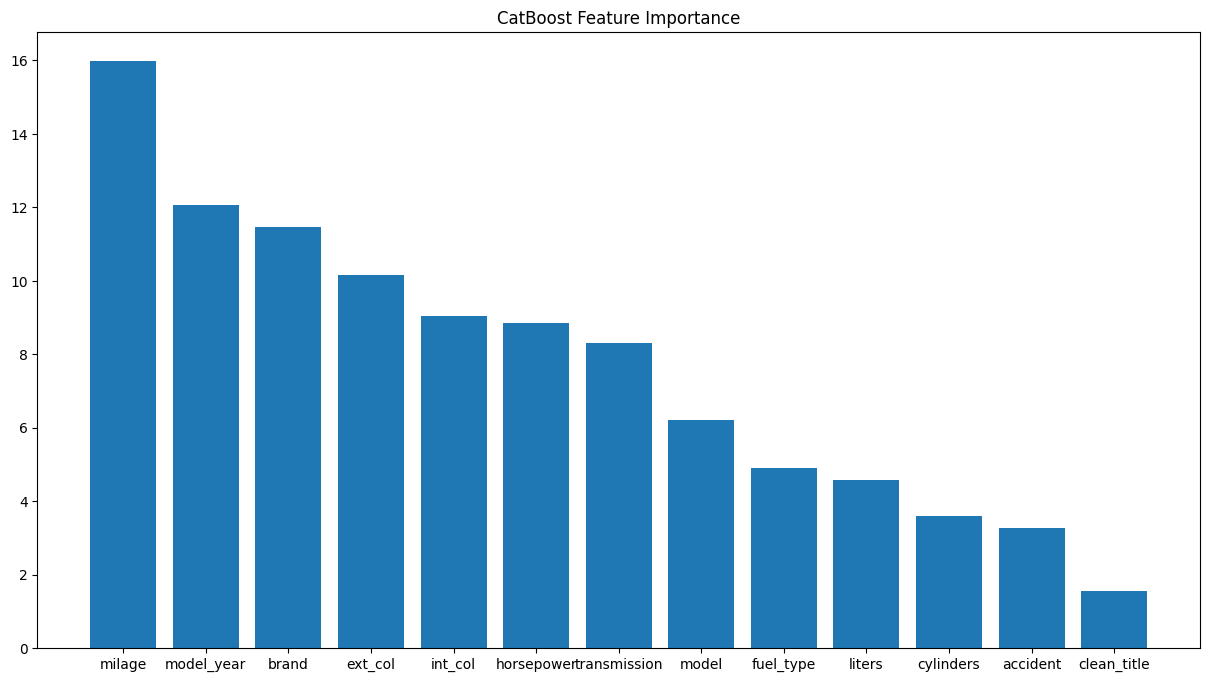

In [70]:
importance = best_model.get_feature_importance()
features = X_train.columns.tolist()

feat_imp = pd.DataFrame({"importance": importance, 
                         "features": features}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(15, 8))
plt.bar(feat_imp["features"], feat_imp["importance"]);
plt.title("CatBoost Feature Importance")
plt.show()

* `Mileage`, `model year`, and `brand` are the top drivers of car prices, confirming that usage, age, and reputation strongly shape market value.

* Aesthetic features like `exterior` and `interior color` surprisingly show significant influence, indicating buyer preferences extend beyond performance.

* `Horsepower`, `transmission`, `accidents`, `clean title` play a smaller role, suggesting they matter less compared to core market signals.